In [13]:
import torch
import requests
import numpy as np
from PIL import Image
from torchvision import models
import matplotlib.pyplot as plt

In [14]:
weights = models.ResNet50_Weights.IMAGENET1K_V1
model = models.resnet50(weights=weights)

In [15]:
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(requests.get(url, stream=True).raw)
    return img

def plot_image(img):
    img = np.array(img)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

def get_top5_predictions(model, img, weights=weights):
    model.eval()

    with torch.no_grad():
        output = model(img)

    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    categories = weights.meta["categories"]
    top5 = [(categories[catid], prob.item()) for catid, prob in zip(top5_catid, top5_prob)]

    return top5

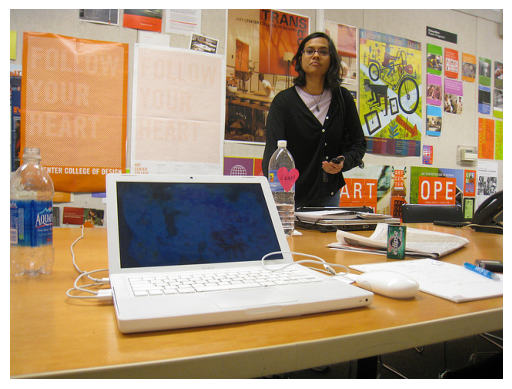

notebook: 0.49
laptop: 0.28
desk: 0.15
mouse: 0.02
web site: 0.01



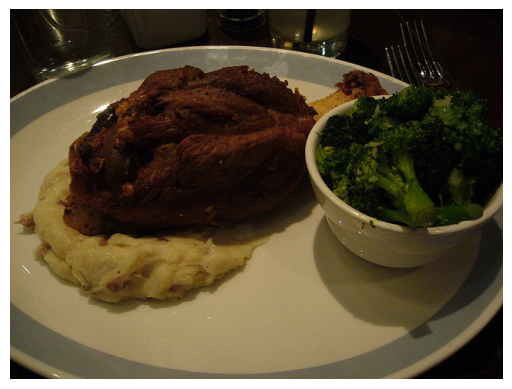

mashed potato: 0.76
meat loaf: 0.13
broccoli: 0.07
plate: 0.02
guacamole: 0.01



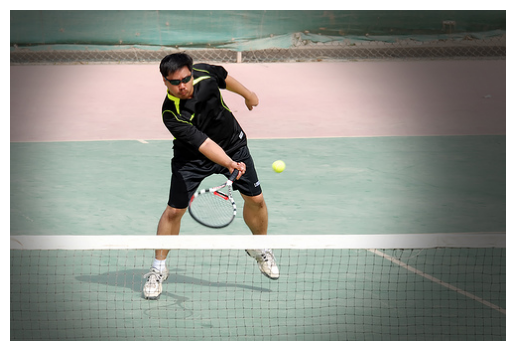

racket: 0.76
tennis ball: 0.24
ping-pong ball: 0.00
volleyball: 0.00
soccer ball: 0.00



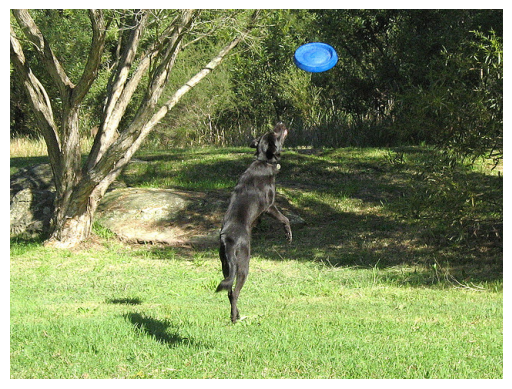

Scottish deerhound: 0.14
Irish wolfhound: 0.14
wallaby: 0.10
miniature schnauzer: 0.08
groenendael: 0.06



In [16]:
urls = [
    "http://images.cocodataset.org/test-stuff2017/000000024309.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000028117.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000006149.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000004954.jpg",
]

preprocess = weights.transforms()

for url in urls:
    image = load_image_from_url(url)

    plot_image(image)

    image = preprocess(image).unsqueeze(0)
    predictions = get_top5_predictions(model, image)
    for cat, prob in predictions:
        print(f"{cat}: {prob:.2f}")
    print()